In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math


from helper import plot_cost_history, split_data, normalize, compute_loss, plot_features_to_value, compute_MAE, compute_MSE
import regression
import params

In [3]:
# Load the data
data = pd.read_csv('dane.data', sep='\t', header=None)
print(data)

print("feature: min, max")
for i in range(data.shape[1]-1):
    print( i, data[i].min(), data[i].max())

idx = data.shape[1]-1
print("value: ", data[idx].min(), data[idx].max())

       0   1  2  3  4   5       6
0     13  30  2 -9  4  -2  235.53
1     13  55  2 -4 -2  -4  330.16
2     13  57  2  0 -2  -1  355.29
3     13  57  2  6  1   9  190.74
4     13  44  2  8 -5  -6  567.06
...   ..  .. .. .. ..  ..     ...
1994  59  32  7 -2 -3   1  506.64
1995  59  40  7  3 -2  -5  383.56
1996  59  34  7  5 -2   4  520.09
1997  59  32  7  6 -3 -10  275.48
1998  59  42  7  9  0   2  714.25

[1999 rows x 7 columns]
feature: min, max
0 13 59
1 30 59
2 2 7
3 -10 9
4 -5 4
5 -10 9
value:  -356.66 1260.63


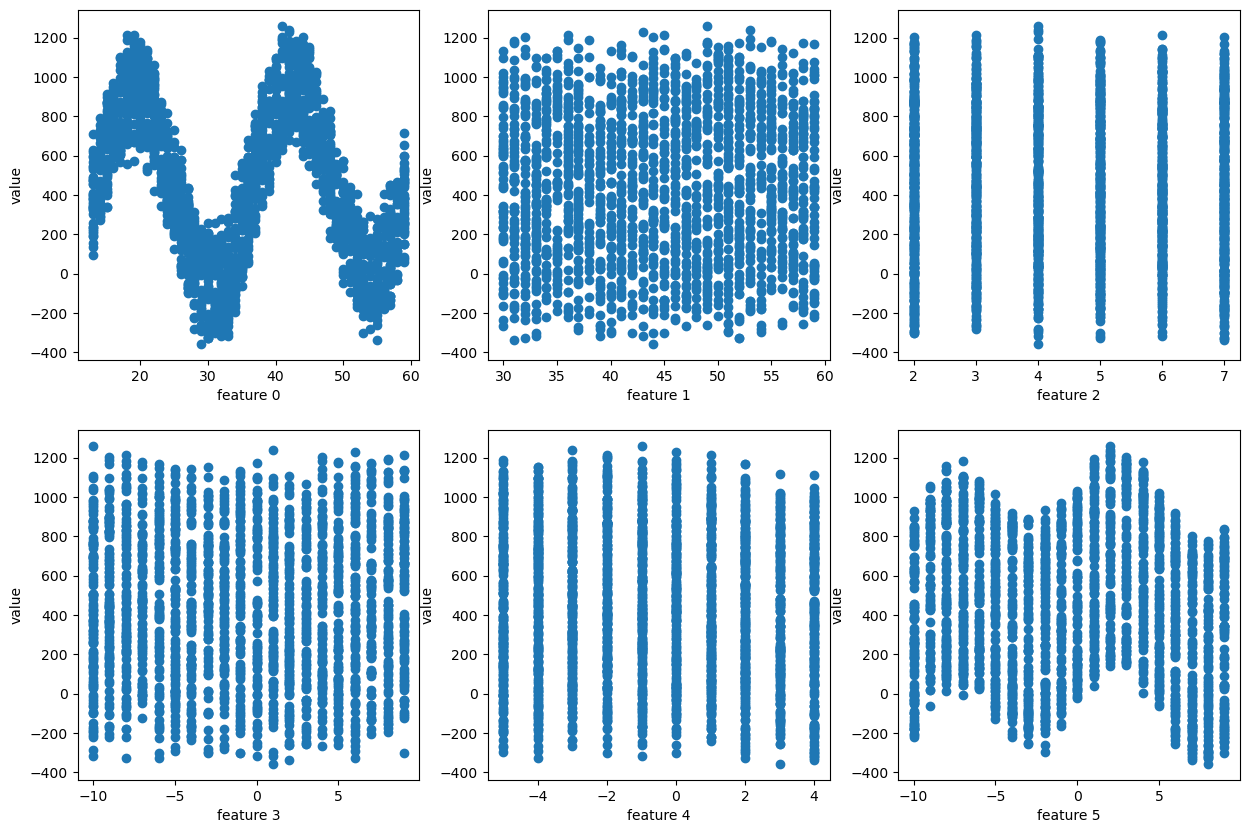

In [4]:
#Plotting each column of the dataframe separately
plot_features_to_value(data)

# Normalized version of the data was created here, but i deleted for clarity

In [5]:
# # prepare data

X = data.iloc[:, 0:6]
X = normalize(X)
X = X.values
Y = data.iloc[:, 6].values

# remove features if applicable
if params.FEATURES_TO_REMOVE is not None:
    X = np.delete(X, params.FEATURES_TO_REMOVE, axis=1)

In [6]:
# # testing gradient descent


# create more complex features
new_params = np.zeros(X.shape[0])

for i in range(X.shape[1]):
    for j in [2,4,8]:
        # add sin and cos of each feature
       new_params = np.c_[new_params, np.sin(j * X[:, i]*np.pi)/2 + 1/2, np.cos(j * X[:, i]*np.pi)/2 + 1/2]
    # for j in [2**k for k in range(5,10)]:
        # add powers of each feature
        # new_params = np.c_[new_params, X[:, i]**(j)]
X = np.c_[X, new_params]

new_params = np.zeros(X.shape[0])   

for i in range(X.shape[1]):
    for j in range(i+1, X.shape[1]):
        new_params = np.c_[new_params, X[:, i] * X[:, j]]
        
X = np.c_[X, new_params]




# X = X_copy
X = np.c_[np.ones(X.shape[0]), X]
print("number of parameters: ", X.shape[1])

number of parameters:  948


In [7]:
X_backup = X
Y_backup = Y


In [8]:
X = X_backup
Y = Y_backup

In [9]:
# split into training (+validating) and test data

X, X_test, Y, Y_test = split_data(X, Y, 0.8)

Final result:  108333.80203543094


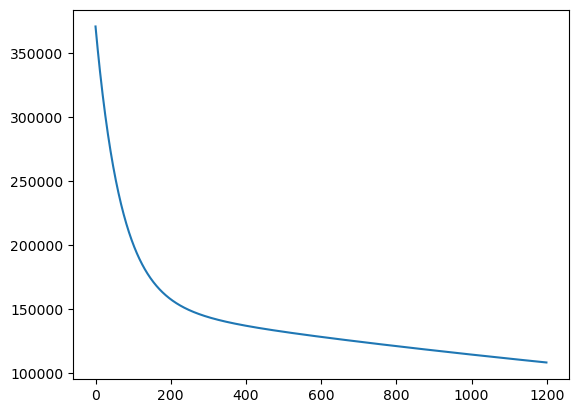

In [10]:
# testing plain linear regression
X_train, X_val, Y_train, Y_val = split_data(X,Y,0.8)
model = regression.LinearRegression()
weights, history = model.fit(X_train, Y_train)
pred = model.predict(X_val)
print("Final result: ", compute_loss(Y_val, pred))
# print("Final theta:", model.weights())
# plot loss over time - x axis is number of iterations y - value of thetas on a test set
values = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in history]

plain_LR = weights
plain_LR_history = history
plt.plot(values)
plt.show()

Final result:  261.3389393644693
Final theta: [ 4.23318194e+01 -9.12577719e+00  2.61125183e+01  3.75712518e-01
  5.07761335e+00 -5.68160513e+00  5.59736983e+00  0.00000000e+00
 -3.77833466e+01 -3.82751724e+00  2.83677638e+02 -5.12517207e+01
  4.53420874e+00 -4.78564491e+00  1.91290117e+00 -3.22510156e+00
  1.30248146e+01  1.09266541e+01  7.32959664e+00  8.20142076e+00
  3.03512337e+01  4.01077715e+00  1.28541765e+01  1.75446075e+01
  1.19805857e+01  4.01077715e+00  1.84874418e+01  2.61463748e+01
  1.13920215e+01  9.78681519e+00  8.26361227e+00  1.04298338e+01
  2.09724067e+01 -5.33066686e+00  1.62237853e+01  6.87134810e+00
  1.06984549e+01  7.57428783e+00 -2.87141989e+01 -3.47939827e+01
  1.11137319e+02 -3.10426186e+01  8.95329207e+00  1.03444032e+01
  0.00000000e+00  5.55984582e+01  5.54174650e+00  1.00247006e+01
 -7.64741529e-02  5.92867472e-01  0.00000000e+00 -4.11258269e+01
 -5.97871122e+01  1.41466448e+02 -4.70107721e+01 -2.22628371e+01
 -9.17082007e+00 -1.27277396e+01  9.53689219

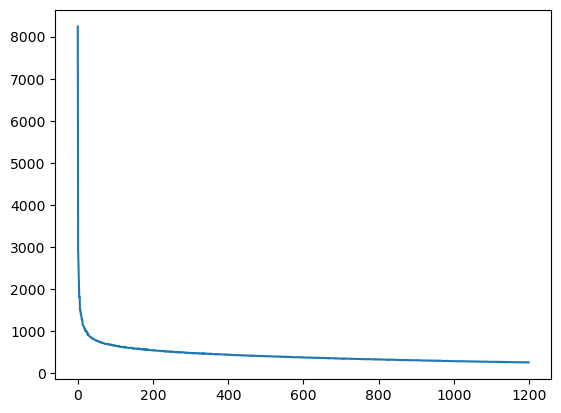

In [11]:
# testing regression for minibatch gradient descent

X_train, X_val, Y_train, Y_val = split_data(X,Y,0.8)

model = regression.MiniBatchLinearRegression()
weights, history = model.fit(X_train, Y_train)
pred = model.predict(X_val)
print("Final result: ", compute_loss(Y_val, pred))
print("Final theta:", model.weights())
# plot loss over time - x axis is number of iterations y - value of thetas on a test set
values = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in history]

minibatch_LR = weights
minibatch_LR_history = history
plt.plot(values)
plt.show()

Final result:  195.04535267608298
Average MAE:  11.111545674555279
Final theta: [ 4.47432131e+01  6.81181971e+00  2.93151252e+01 -4.18043966e-01
 -1.53318006e+01 -1.73536150e-01  1.44510596e+01  0.00000000e+00
 -8.70792428e+01 -7.55165834e+00  4.01723293e+02 -8.01935896e+01
 -2.47304154e+00 -1.89960536e+01  1.52913375e+01 -7.34864416e+00
  7.49921779e+00  6.73810586e+00  9.97295141e+00 -2.77714369e+00
  2.45144011e+01  9.24894855e+00  1.56406189e+01 -3.19285045e-01
  2.02288120e+01  9.24894855e+00  3.13958201e-01  4.82316038e+01
 -6.58267332e+00  1.60734386e+01 -6.79947111e+00 -4.34390742e+00
  2.18472560e+01 -1.18258530e+01  1.09448477e+01  1.55648576e+01
  1.45534895e+01  1.40874519e+01 -4.91234238e+01 -5.70340656e+01
  1.57858668e+02 -5.35874742e+01  3.16515544e+01 -1.77420005e+01
  0.00000000e+00  4.73566585e+01  6.12686022e+00  1.51735056e+01
 -8.24357151e+00  2.30020480e+01  0.00000000e+00 -7.11033848e+01
 -6.55530376e+01  1.91792217e+02 -5.49552014e+01 -6.67199257e+01
 -2.239305

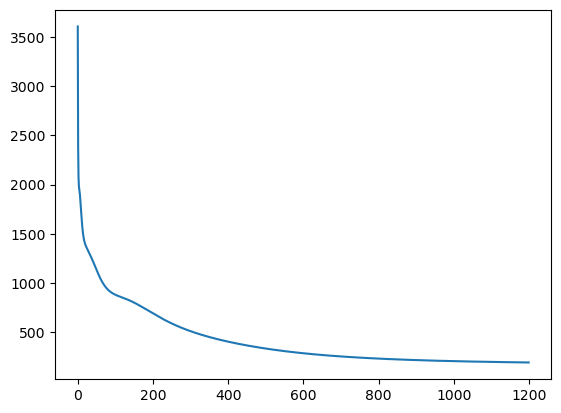

In [19]:
# testing regression for stochastic gradient descent
X_train, X_val, Y_train, Y_val = split_data(X,Y,0.8)

model = regression.StochasticLinearRegression()
weights, history = model.fit(X_train, Y_train)
pred = model.predict(X_val)
print("Final result: ", compute_loss(Y_val, pred))
print("Average MAE: ", compute_MAE(Y_val, pred))
print("Final theta:", model.weights())
# plot loss over time - x axis is number of iterations y - value of thetas on a test set
values = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in history]

stochastic_LR = weights
stochastic_LR_history = history
plt.plot(values)
plt.show()


In [20]:
# used for saving weights history for calculations in extra file

import csv

with open('minibatch_final_weights.csv', mode='w') as file: # no0 means that all features are used (i know, but easier to code)
    writer = csv.writer(file)
    writer.writerow(minibatch_LR)

Final result:  1365.2322882413096
Average distance:  27.175072848408764
1200


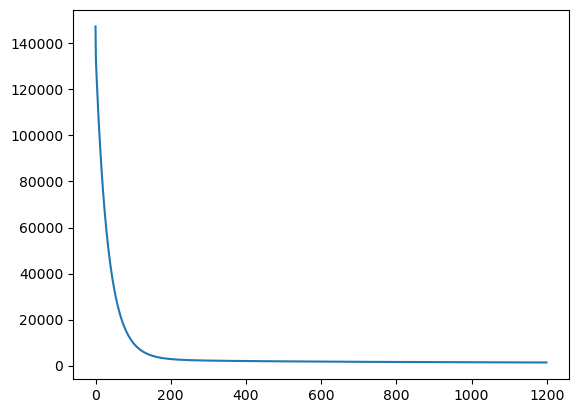

In [13]:
# using classes from regression file
X_train, X_val, Y_train, Y_val = split_data(X,Y,0.8)
model = regression.RidgeRegression(0.001)
weights, history = model.fit(X_train, Y_train)
pred = model.predict(X_val)
print("Final result: ", compute_loss(Y_val, pred))
print("Average distance: ", compute_MAE(Y_val, pred))
# print("Final theta:", model.weights())

values = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in history]

ridge_LR = weights
ridge_LR_history = history
print(len(ridge_LR_history))
plt.plot(values)
plt.show()

Final result:  1602.1070414020137
average distance:  29.497046701556677


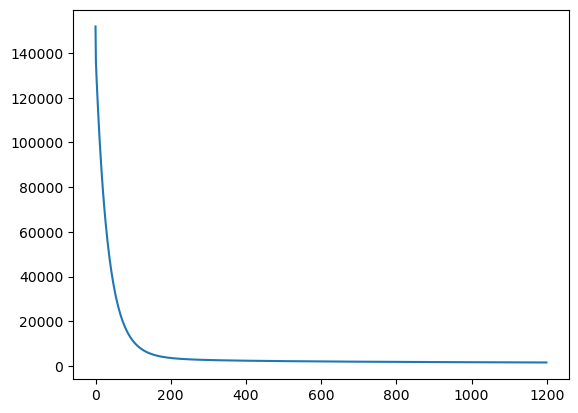

In [14]:

# using classes from regression file
X_train, X_val, Y_train, Y_val = split_data(X,Y,0.8)
model = regression.LassoRegression(0.001)
weights, history = model.fit(X_train, Y_train)
pred = model.predict(X_val)
print("Final result: ", compute_loss(Y_val, pred))
print("average distance: ", compute_MAE(Y_val, pred))
# print("Final theta:", model.weights())
values = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in history]

lasso_LR = weights
lasso_LR_history = history
plt.plot(values)
plt.show()

Final result:  1297.5425348078084
average distance:  27.521454477610632


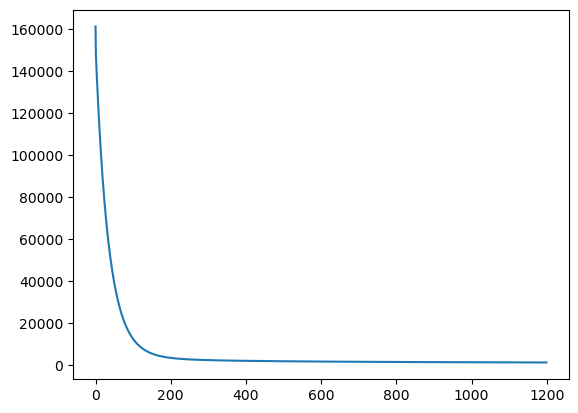

In [15]:
# using classes from regression file
X_train, X_val, Y_train, Y_val = split_data(X,Y,0.8)
model = regression.ElasticNetRegression(alpha=0.001, l1_ratio=0.1)
weights, history = model.fit(X_train, Y_train)
pred = model.predict(X_val)
print("Final result: ", compute_loss(Y_val, pred))
print("average distance: ", compute_MAE(Y_val, pred))

values = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in history]

elastic_LR = weights
elastic_LR_history = history
plt.plot(values)
plt.show()

Test set loss for plain linear regression:  104713.69829168956
Test set loss for minibatch linear regression:  229.27629989682563
Test set loss for stochastic linear regression:  231.93978875215723
Test set loss for ridge linear regression:  1436.0450121446827
Test set loss for lasso linear regression:  1445.4799807999586
Test set loss for elastic linear regression:  1416.2593365472212


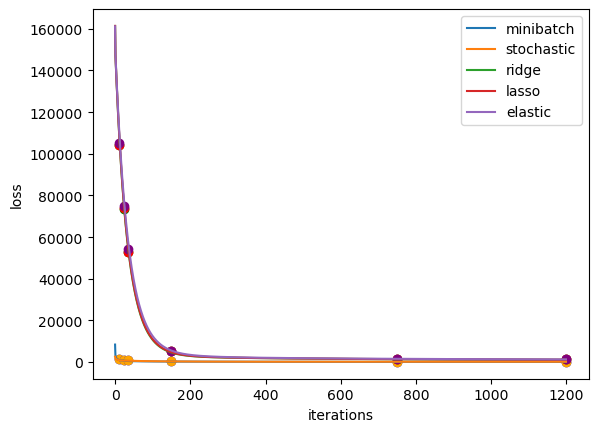

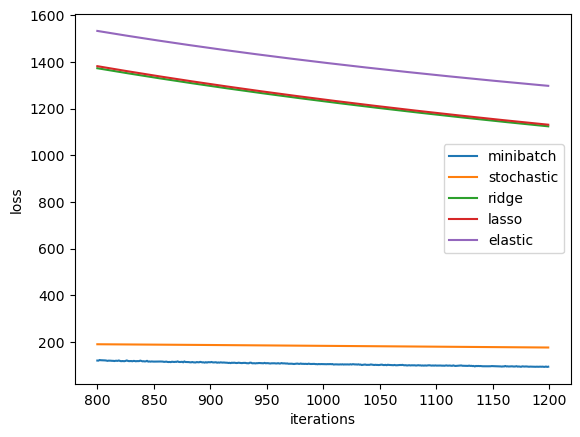

In [16]:
# final testing of the model

# plain
print("Test set loss for plain linear regression: ", compute_loss(Y_test, np.dot(X_test, plain_LR)))
# minibatch
print("Test set loss for minibatch linear regression: ", compute_loss(Y_test, np.dot(X_test, minibatch_LR)))
# stochastic
print("Test set loss for stochastic linear regression: ", compute_loss(Y_test, np.dot(X_test, stochastic_LR)))
# ridge
print("Test set loss for ridge linear regression: ", compute_loss(Y_test, np.dot(X_test, ridge_LR)))
# lasso
print("Test set loss for lasso linear regression: ", compute_loss(Y_test, np.dot(X_test, lasso_LR)))
# elastic
print("Test set loss for elastic linear regression: ", compute_loss(Y_test, np.dot(X_test, elastic_LR)))

# plot things - loss over time
for mult in [0.01, 0.02, 0.03, 0.125, 0.625, 1]:
    idx = math.ceil(len(plain_LR_history)*mult) -1
    # plt.scatter([idx],[compute_loss(Y_test, np.dot(X_test, plain_LR_history[idx]))],color='blue')
    plt.scatter([idx],[compute_loss(Y_test, np.dot(X_test, minibatch_LR_history[idx]))],color='blue')
    plt.scatter([idx],[compute_loss(Y_test, np.dot(X_test, stochastic_LR_history[idx]))],color='orange')
    plt.scatter([idx],[compute_loss(Y_test, np.dot(X_test, ridge_LR_history[idx]))],color='green')
    plt.scatter([idx],[compute_loss(Y_test, np.dot(X_test, lasso_LR_history[idx]))],color='red')
    plt.scatter([idx],[compute_loss(Y_test, np.dot(X_test, elastic_LR_history[idx]))],color='purple')
    
# results = [compute_loss(Y_test, np.dot(X_test, iter)) for iter in plain_LR_history]
# plt.plot(range(len(plain_LR_history)), results, label="plain")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in minibatch_LR_history]
plt.plot(range(len(minibatch_LR_history)), results, label="minibatch")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in stochastic_LR_history]
plt.plot(range(len(stochastic_LR_history)), results, label="stochastic")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in ridge_LR_history]
plt.plot(range(len(ridge_LR_history)), results, label="ridge")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in lasso_LR_history]
plt.plot(range(len(lasso_LR_history)), results, label="lasso")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in elastic_LR_history]
plt.plot(range(len(elastic_LR_history)), results, label="elastic")

plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()



# remove first third of a history
plain_LR_history_without_beginning = plain_LR_history[math.ceil(len(plain_LR_history)*2/3):]
minibatch_LR_history_without_beginning = minibatch_LR_history[math.ceil(len(minibatch_LR_history)*2/3):]
stochastic_LR_history_without_beginning = stochastic_LR_history[math.ceil(len(stochastic_LR_history)*2/3):]
ridge_LR_history_without_beginning = ridge_LR_history[math.ceil(len(ridge_LR_history)*2/3):]
lasso_LR_history_without_beginning = lasso_LR_history[math.ceil(len(lasso_LR_history)*2/3):]
elastic_LR_history_without_beginning = elastic_LR_history[math.ceil(len(elastic_LR_history)*2/3):]

plain_offset = len(plain_LR_history) - len(plain_LR_history_without_beginning)
minibatch_offset = len(minibatch_LR_history) - len(minibatch_LR_history_without_beginning)
stochastic_offset = len(stochastic_LR_history) - len(stochastic_LR_history_without_beginning)
ridge_offset = len(ridge_LR_history) - len(ridge_LR_history_without_beginning)
lasso_offset = len(lasso_LR_history) - len(lasso_LR_history_without_beginning)
elastic_offset = len(elastic_LR_history) - len(elastic_LR_history_without_beginning)


# results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in plain_LR_history_without_beginning]
# plt.plot([i+plain_offset for i in range(len(results))], results, label="plain")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in minibatch_LR_history_without_beginning]
plt.plot([i+minibatch_offset for i in range(len(results))], results, label="minibatch")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in stochastic_LR_history_without_beginning]
plt.plot([i+stochastic_offset for i in range(len(results))], results, label="stochastic")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in ridge_LR_history_without_beginning]
plt.plot([i+ridge_offset for i in range(len(results))], results, label="ridge")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in lasso_LR_history_without_beginning]
plt.plot([i+lasso_offset for i in range(len(results))], results, label="lasso")
results = [compute_loss(Y_val, np.dot(X_val, iter)) for iter in elastic_LR_history_without_beginning]
plt.plot([i+elastic_offset for i in range(len(results))], results, label="elastic")

# rescale x axis accordingly ( add half of the length of the history
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()


# add lines for 0.125, 0.25, 0.5, 1 of training time



In [24]:
# used for saving weights history for calculations in extra file

import csv

with open('weights/minibatch_final_weights.csv', mode='w') as file: # no0 means that all features are used (i know, but easier to code)
    # copy normalization parameters
    writer = csv.writer(file)
    for i in range(data.shape[1]-1):
        writer.writerow([data[i].min(), data[i].max()])
    writer.writerow(minibatch_LR)

In [ ]:
# analytical solution for this set of hyperparameters
# calculating the analytical solution -> theta = (X^T * X)^-1 * X^T * y
def analytical_solution(X, y):
    X_transpose = np.transpose(X)
    return np.linalg.pinv(X_transpose.dot(X)).dot(X_transpose).dot(y)

# function for calculating the analytical solution -> theta = (X^T * X + λ *I)^-1 * X^T * y
def analytical_solution_ridge(X, y, lambda_):
    X_transpose = np.transpose(X)
    I = np.identity(X.shape[1])
    theta = np.linalg.inv(X_transpose.dot(X) + I * lambda_).dot(X_transpose).dot(y)
    return theta

sol = analytical_solution(X_train, Y_train)
# print("Analytical solution: ", sol)
print("Test set loss for analytical solution: ", compute_loss(Y_test, np.dot(X_test, sol)))

for lambda_ in params.TEST_LAMBDAS:
    sol = analytical_solution_ridge(X_train, Y_train, lambda_)
# print("Analytical solution: ", sol)
    print("Test set loss for ridge analytical solution: lambda:", lambda_, "value: ", compute_loss(Y_test, np.dot(X_test, sol)))


Test set loss for analytical solution:  67.06960542857206
Test set loss for ridge analytical solution: lambda: 1e-08 value:  67.00943911220037
Test set loss for ridge analytical solution: lambda: 0.5 value:  187.56366624729475
Test set loss for ridge analytical solution: lambda: 1 value:  282.72381892150463
Test set loss for ridge analytical solution: lambda: 5 value:  565.9852964593614
Test set loss for ridge analytical solution: lambda: 10 value:  712.6392603210304
Test set loss for ridge analytical solution: lambda: 100 value:  1977.241336023407
Test set loss for ridge analytical solution: lambda: 1000 value:  20908.483226321507
Test set loss for ridge analytical solution: lambda: 10000 value:  107295.25588812884
Test set loss for ridge analytical solution: lambda: 100000 value:  188786.20973462588
